In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statistics import mode
# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error


In [2]:
#load dataset and view
data = pd.read_excel('Task 2 data.xlsx')
data.head()

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,...,customer_id,merchant_long_lat,movement,year,month,day_of_week,long,lat,merchant_long,merchant_lat
0,authorized,1.0,ACC-1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,...,CUS-2487424745,153.38 -27.99,debit,2018,8,2,153.41,-27.95,NaN,NaN
1,authorized,0.0,ACC-1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,...,CUS-2487424745,151.21 -33.87,debit,2018,8,2,153.41,-27.95,NaN,NaN
2,authorized,1.0,ACC-1222300524,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,...,CUS-2142601169,151.21 -33.87,debit,2018,8,2,151.23,-33.94,NaN,NaN
3,authorized,1.0,ACC-1037050564,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,...,CUS-1614226872,153.05 -26.68,debit,2018,8,2,153.10,-27.66,NaN,NaN
4,authorized,1.0,ACC-1598451071,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,...,CUS-2487424745,153.44 -28.06,debit,2018,8,2,153.41,-27.95,NaN,NaN


## Compute Target Variable: Annual Salary

In [3]:
#Extract relevant columns to review
salary = data[['customer_id','txn_description','amount','balance','movement','transaction_id','date']]
salary = salary[salary.txn_description == 'PAY/SALARY']
salary

,customer_id,txn_description,amount,balance,movement,transaction_id,date
50,CUS-1462656821,PAY/SALARY,3903.95,8342.11,credit,9ca281650e5d482d9e53f85e959baa66,2018-08-01
61,CUS-2500783281,PAY/SALARY,1626.48,2040.58,credit,1822eb0e1bbe4c9e95ebbb0fa2cc4323,2018-08-01
64,CUS-326006476,PAY/SALARY,983.36,3158.51,credit,bd62b1799a454cedbbb56364f7c40cbf,2018-08-01
68,CUS-1433879684,PAY/SALARY,1408.08,2517.66,credit,0d95c7c932bb48e5b44c2637bdd3efe9,2018-08-01
70,CUS-4123612273,PAY/SALARY,1068.04,2271.79,credit,f50ccf1195214d14a0acbfcb5a265193,2018-08-01
...,...,...,...,...,...,...,...
11995,CUS-1646621553,PAY/SALARY,1098.91,9378.51,credit,0e6cffb4401043c891ab7a50ec594208,2018-10-31
12000,CUS-1271030853,PAY/SALARY,1158.15,3440.01,credit,ad13e06fffba4771b3c994f9147e68c0,2018-10-31
12001,CUS-1388323263,PAY/SALARY,1043.12,11381.44,credit,14a1604e6ead4b54b65d7a28ec546a69,2018-10-31
12003,CUS-164374203,PAY/SALARY,1395.49,11454.52,credit,cd1b1dea1d2f43e882d3499b3717d23b,2018-10-31


In [4]:
#Extract all unique customer id to start with
salary_df = pd.DataFrame(salary.customer_id.unique(),columns=['customer_id'])
salary_df

,customer_id
0,CUS-1462656821
1,CUS-2500783281
2,CUS-326006476
3,CUS-1433879684
4,CUS-4123612273
...,...
95,CUS-1816693151
96,CUS-497688347
97,CUS-423725039
98,CUS-1739931018


In [5]:
#Compute annual_salary:
salary_freq = []
salary_amount = []
for i in range(len(salary_df)):
    customer = salary.loc[(salary.customer_id == salary_df.customer_id[i]), ["date", "amount"]]
    #Group all transaction in the same date
    customer = customer.groupby("date", as_index = False).sum()
    count = len(customer)
    if count == 0:
        salary_freq.append(np.nan)
        salary_amount.append(np.nan)
    else:
        days_between = []
        for day in range(len(customer)-1):
            days_between.append((customer.date[day + 1] - customer.date[day]).days)
    salary_freq.append(max(days_between))
    salary_amount.append(mode(customer.amount))

salary_df['salary_freq'] = salary_freq
salary_df['salary_amount'] = salary_amount
salary_df['annual_salary'] = salary_df['salary_amount'] / salary_df['salary_freq'] * 365.25 

#salary_df now has target variable: annual_salary

In [6]:
#Check the resulting dataframe:
salary_df
#Everything looks good, now the target variable is computed

,customer_id,salary_freq,salary_amount,annual_salary
0,CUS-1462656821,14,3903.95,101851.266964
1,CUS-2500783281,7,1626.48,84867.402857
2,CUS-326006476,7,983.36,51310.320000
3,CUS-1433879684,14,1408.08,36735.801429
4,CUS-4123612273,7,1068.04,55728.801429
...,...,...,...,...
95,CUS-1816693151,31,8835.98,104107.796613
96,CUS-497688347,61,4910.90,29405.020082
97,CUS-423725039,31,3712.56,43742.340000
98,CUS-1739931018,30,4863.62,59214.573500


## Features (i.e. predictor variable)

For a linear regression model to predict annual salary for we need to pay attention to the assumption that features needs to be independent. We will consider this while generating new features. Next, we will derive some predictor from the dataset we have.

After research and brainstorming, there are some features could be benefitial for the linear model:
    1. Average weekly number of transaction
    2. Average monthly transaction amount
    3. Number of large transactions (over 100$)
    4. Maxiumn transaction
    5. Average balance of all time
    6. State of residence, or most active state (i.e. where a customer make transaction the most)

Combined with the original date we have:
    1. Age
    2. Gender

In [7]:
# Unique customer_id
unique_id = data.customer_id.unique()
print(unique_id)
print(len(unique_id))

['CUS-2487424745' 'CUS-2142601169' 'CUS-1614226872' 'CUS-2688605418'
 'CUS-4123612273' 'CUS-3026014945' 'CUS-2031327464' 'CUS-2317998716'
 'CUS-1462656821' 'CUS-3142625864' 'CUS-860700529' 'CUS-2370108457'
 'CUS-2630892467' 'CUS-3716701010' 'CUS-3378712515' 'CUS-2695611575'
 'CUS-1669695324' 'CUS-3255104878' 'CUS-537508723' 'CUS-2376382098'
 'CUS-3129499595' 'CUS-883482547' 'CUS-51506836' 'CUS-1196156254'
 'CUS-2178051368' 'CUS-809013380' 'CUS-3702001629' 'CUS-127297539'
 'CUS-1646183815' 'CUS-164374203' 'CUS-2283904812' 'CUS-3180318393'
 'CUS-3904958894' 'CUS-1604596597' 'CUS-1617121891' 'CUS-2206365095'
 'CUS-2599279756' 'CUS-3117610635' 'CUS-1433879684' 'CUS-2500783281'
 'CUS-326006476' 'CUS-527400765' 'CUS-443776336' 'CUS-2663907001'
 'CUS-4142663097' 'CUS-1842679196' 'CUS-3249305314' 'CUS-1271030853'
 'CUS-1646621553' 'CUS-325142416' 'CUS-3462882033' 'CUS-1892177589'
 'CUS-1117979751' 'CUS-495599312' 'CUS-1388323263' 'CUS-1790886359'
 'CUS-4023861240' 'CUS-586638664' 'CUS-42372503

In [8]:
# Average weekly number of transaction
avg_wk_trans = []
for i in unique_id:
    #number of transaction made in 3-months
    temp = data.loc[(data.customer_id == i), ['date']]
    #Number of transaction/number of days = daily average transaction; Then, times 7 to get weekly average
    avg_wk_trans.append(round(len(temp)/temp.nunique()*7)[0])

In [9]:
#Average monthly transaction amount
avg_mon_trans = []
for i in unique_id:
    temp = data.loc[data.customer_id == i,['amount']]
    avg_mon_trans.append(temp.amount.sum()/3)

In [10]:
#Number of large transactions (over 100$)
large_trans = []
for i in unique_id:
    temp = data.loc[data.customer_id == i,['amount']]
    temp = temp[temp.amount > 200]
    large_trans.append(len(temp))

In [11]:
# Maximun transaction
max_trans = []
for i in unique_id:
    temp = data.loc[(data.customer_id == i), ['amount']]
    max_trans.append(max(temp.values)[0])

In [12]:
#Average balance of all time
avg_bal = []
for i in unique_id:
    temp = data.loc[data.customer_id == i,'balance']
    avg_bal.append(temp.mean())

In [13]:
#State of residence, we assume the state customer make the most transaction is their state of residence.

#When multi mode exist, run this:
#Reference from: https://stackoverflow.com/questions/52885949/how-to-handle-no-unique-mode-found-2-equally-common-values-in-below-function
def get_first_mode(a):
    import numpy as np
    from collections import Counter
    c = Counter(a)  
    mode_count = max(c.values())
    mode = {key for key, count in c.items() if count == mode_count}
    first_mode = next(x for x in a if x in mode)
    return first_mode


state = []
for i in unique_id:
    temp = data.loc[data.customer_id == i, 'merchant_state']
    temp.dropna(axis=0,inplace=True)
    from statistics import StatisticsError
    try:
        state.append(mode(temp))
    except StatisticsError:
        
        state.append(get_first_mode(temp.values))

In [14]:
test = data.loc[data.customer_id == unique_id[0], 'merchant_state']
test.dropna(axis=0,inplace=True)

In [15]:
#For the two readily features:
#Age
age = []
for i in unique_id:
    temp = data.loc[data.customer_id == i, 'age']
    age.append(mode(temp))
    
#Gender, we condcut one hot_encoded here. Male = 1, Female = 0
gender = []
for i in unique_id:
    temp = data.loc[data.customer_id == i, 'gender']
    if temp.mode().values == 'F':
        gender.append(0)
    else:
        gender.append(1)

In [16]:
#Combine all arrays
features = [avg_wk_trans, avg_mon_trans, large_trans, max_trans, avg_bal, state, age, gender]

In [17]:
feature_df = pd.DataFrame({'customer_id':unique_id,
                           'average weekly transaction':avg_wk_trans,
                           'average monthly n_transaction': avg_mon_trans,
                           'number of max transactions': large_trans,
                           'maximun transaction':max_trans,
                           'average balance':avg_bal,
                           'state of residence':state,
                           'age':age,
                           'gender':gender,
                           'annual_salary':salary_df['annual_salary']
    
})
feature_df

,customer_id,average weekly transaction,average monthly n_transaction,number of max transactions,maximun transaction,average balance,state of residence,age,gender,annual_salary
0,CUS-2487424745,48.0,8737.196667,19,1452.21,1735.120675,QLD,26,0,101851.266964
1,CUS-2142601169,29.0,7898.816667,19,2349.55,1191.291419,NSW,38,1,84867.402857
2,CUS-1614226872,24.0,6428.813333,14,892.09,3331.424479,QLD,40,0,51310.320000
3,CUS-2688605418,14.0,6850.080000,10,2320.30,5592.980078,NSW,20,1,36735.801429
4,CUS-4123612273,21.0,7437.373333,21,1068.04,5210.575373,VIC,43,0,55728.801429
...,...,...,...,...,...,...,...,...,...,...
95,CUS-2505971401,14.0,9903.973333,13,1946.57,11747.912549,SA,40,0,104107.796613
96,CUS-2819545904,11.0,9421.826667,10,3231.26,111300.797619,QLD,42,1,29405.020082
97,CUS-3395687666,8.0,4738.670000,8,1757.81,16749.425000,NSW,42,1,43742.340000
98,CUS-1147642491,15.0,9660.273333,16,1711.39,9032.841186,NSW,34,0,59214.573500


In [18]:
feature_df.isnull().sum()

customer_id                      0
average weekly transaction       0
average monthly n_transaction    0
number of max transactions       0
maximun transaction              0
average balance                  0
state of residence               0
age                              0
gender                           0
annual_salary                    0
dtype: int64

## One-hot encoding and standardising

In [19]:
minmax = MinMaxScaler()
numeric = feature_df.select_dtypes(include=['int','float']).drop(columns='annual_salary')
numeric = numeric.columns
feature_df[numeric] = minmax.fit_transform(feature_df[numeric])
feature_df

,customer_id,average weekly transaction,average monthly n_transaction,number of max transactions,maximun transaction,average balance,state of residence,age,gender,annual_salary
0,CUS-2487424745,1.000,0.451868,0.894737,0.106079,0.002071,QLD,0.133333,0.0,101851.266964
1,CUS-2142601169,0.525,0.380055,0.894737,0.214716,0.000000,NSW,0.333333,1.0,84867.402857
2,CUS-1614226872,0.400,0.254140,0.631579,0.038268,0.008151,QLD,0.366667,0.0,51310.320000
3,CUS-2688605418,0.150,0.290224,0.421053,0.211175,0.016764,NSW,0.033333,1.0,36735.801429
4,CUS-4123612273,0.325,0.340530,1.000000,0.059569,0.015308,VIC,0.416667,0.0,55728.801429
...,...,...,...,...,...,...,...,...,...,...
95,CUS-2505971401,0.150,0.551810,0.578947,0.165929,0.040206,SA,0.366667,0.0,104107.796613
96,CUS-2819545904,0.075,0.510511,0.421053,0.321461,0.419365,QLD,0.400000,1.0,29405.020082
97,CUS-3395687666,0.000,0.109368,0.315789,0.143077,0.059255,NSW,0.400000,1.0,43742.340000
98,CUS-1147642491,0.175,0.530935,0.736842,0.137457,0.029865,NSW,0.266667,0.0,59214.573500


In [20]:
#One-hot encoding using get_dummies
state_dummies = pd.get_dummies(feature_df['state of residence'],drop_first=True)
feature_df = pd.concat([feature_df,state_dummies],axis=1).drop(columns='state of residence')
feature_df

,customer_id,average weekly transaction,average monthly n_transaction,number of max transactions,maximun transaction,average balance,age,gender,annual_salary,NT,QLD,SA,VIC,WA
0,CUS-2487424745,1.000,0.451868,0.894737,0.106079,0.002071,0.133333,0.0,101851.266964,0,1,0,0,0
1,CUS-2142601169,0.525,0.380055,0.894737,0.214716,0.000000,0.333333,1.0,84867.402857,0,0,0,0,0
2,CUS-1614226872,0.400,0.254140,0.631579,0.038268,0.008151,0.366667,0.0,51310.320000,0,1,0,0,0
3,CUS-2688605418,0.150,0.290224,0.421053,0.211175,0.016764,0.033333,1.0,36735.801429,0,0,0,0,0
4,CUS-4123612273,0.325,0.340530,1.000000,0.059569,0.015308,0.416667,0.0,55728.801429,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,CUS-2505971401,0.150,0.551810,0.578947,0.165929,0.040206,0.366667,0.0,104107.796613,0,0,1,0,0
96,CUS-2819545904,0.075,0.510511,0.421053,0.321461,0.419365,0.400000,1.0,29405.020082,0,1,0,0,0
97,CUS-3395687666,0.000,0.109368,0.315789,0.143077,0.059255,0.400000,1.0,43742.340000,0,0,0,0,0
98,CUS-1147642491,0.175,0.530935,0.736842,0.137457,0.029865,0.266667,0.0,59214.573500,0,0,0,0,0


## Train test split

In [21]:
x = feature_df.drop(columns=['customer_id','annual_salary'])
y = feature_df['annual_salary']
print('Shape of x:{}. Shape of y:{}'.format(x.shape,y.shape))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 1, shuffle=True)
print('Shape of x_train:{}. Shape of x_test:{}'.format(x_train.shape,x_test.shape))
print('Shape of y_train:{}. Shape of y_test:{}'.format(y_train.shape,y_test.shape))

Shape of x:(100, 12). Shape of y:(100,)
Shape of x_train:(70, 12). Shape of x_test:(30, 12)
Shape of y_train:(70,). Shape of y_test:(30,)


## Model Building
Now our data is ready for model building. In this section, we will build two model as per request.
    1. Linear Regression (Will try regularized model as well)
    2. Decision Tree model

In [22]:
# 1. Linear regression
lr = LinearRegression()
model_lr = lr.fit(x_train, y_train)
pred_lr = model_lr.predict(x_test)

#RMSE
np.sqrt(mean_squared_error(y_test, pred_lr))

29463.236545729793

In [23]:
#Beta
lr_beta = pd.DataFrame([model_lr.coef_],columns=x.columns)
lr_beta

,average weekly transaction,average monthly n_transaction,number of max transactions,maximun transaction,average balance,age,gender,NT,QLD,SA,VIC,WA
0,33571.372507,26220.971736,-20378.202327,-35892.025308,19021.497504,1465.066722,10219.140701,981.232886,-16369.153309,46008.922792,5199.151532,-6325.240543


Text(0.5, 1.0, 'Residual Plot')

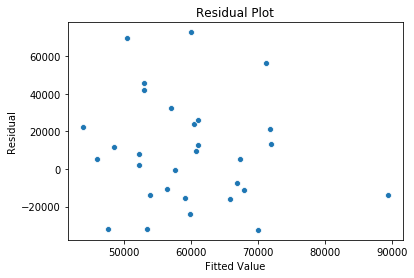

In [24]:
#Residual plot
residual = y_test-pred_lr
sns.scatterplot(pred_lr,residual)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.title('Residual Plot')
#The residuals are random, the assumption is satisfied.

In [25]:
#Bonus
from sklearn.linear_model import LassoCV
lasso = LassoCV

In [26]:
# 2. Single Desicion Tree
dt = DecisionTreeRegressor()
model_dt = dt.fit(x_train, y_train)
pred_dt = model_dt.predict(x_test)
#RMSE
np.sqrt(mean_squared_error(y_test,pred_dt))

38976.21847285514

Text(0.5, 1.0, 'Residual Plot')

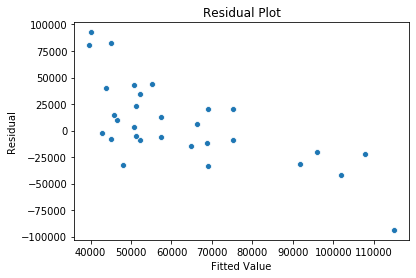

In [27]:
#Residual plot
residual = y_test-pred_dt
sns.scatterplot(pred_dt,residual)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.title('Residual Plot')
#The residuals are not random, there is a linear pattern. The single decision tree model is worse-off.

## Conclusion:
Linear regression is better in this case. However, both models have RMSE over 29,000. Which is not accurate model to predict annual salary. Some method to improve are: removing outliers, feature engineering (add more feature), use more data, or use more advanced model(e.g. Random Forest, XGBoost, Neural Network), AIC or BIC for selecting optimal number of feature.\
\
However, since there is only 100 entries of "annual_salary", the data is too limited and we need more data to be collected to make a significant improvement.